In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [8]:
workout = pd.read_csv('workoutlog.csv')
workout.head()

,Activity,Weight,Reps,Duration,DateTime
0,Pu,40.0,15.0,NaN,2020-09-29 08:45:04.830838
1,Pu,40.0,20.0,NaN,2020-09-29 08:47:42.839794
2,Pu,40.0,15.0,NaN,2020-09-29 09:24:34.350691
3,P,40.0,8.0,NaN,2020-09-29 11:35:26.075974
4,Pu,40.0,20.0,NaN,2020-09-29 11:36:19.083997


In [9]:
#assign proper types
workout['DateTime'] = pd.to_datetime(workout['DateTime'])
workout['Date'] = workout['DateTime'].dt.date

In [11]:
stats = workout.groupby(['Date','Activity'])
stats_sum = stats.sum().reset_index()
stats_sum[stats_sum['Activity'] == 'D']

,Date,Activity,Weight,Reps
0,2020-09-29,D,160.0,73.0
3,2020-09-30,D,80.0,36.0
8,2020-10-01,D,80.0,10.0
14,2020-10-06,D,40.0,60.0
27,2020-10-14,D,0.0,55.0
33,2020-10-18,D,0.0,45.0
41,2020-10-23,D,0.0,30.0
44,2020-10-26,D,40.0,12.0
51,2020-11-02,D,0.0,30.0
69,2021-01-05,D,0.0,20.0


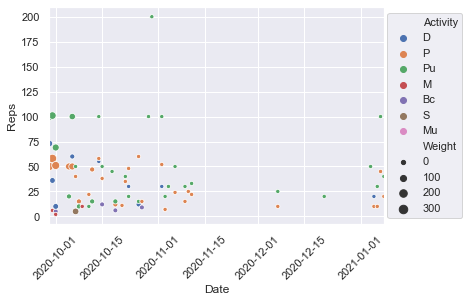

In [15]:
dips = stats_sum[stats_sum['Activity'] == 'D']
x=dips['Date']
y=dips['Reps']
g=sns.scatterplot(data=stats_sum, y='Reps', x='Date',
    hue='Activity',size='Weight', legend='brief')
g.set(xlim=(stats_sum['Date'].min(),stats_sum['Date'].max()))
plt.setp(g.get_xticklabels(), rotation=45)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.savefig('workout_results.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FB0297CA0>],
      dtype=object)

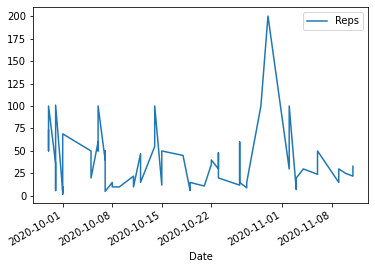

In [36]:
stats_sum.plot(x='Date',y='Reps', subplots=True)